# 1 Introdução ao Processamento de Imagens  

> ## **Requisitos:** 
> - numpy 
> - matplotlib 
> - scikit-image 
> - scipy 
> - scikit-learn 

Configurando o matplotlib para exibir as figuras no notebook:

In [1]:
%matplotlib inline
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%config InlineBackend.figure_format = 'retina'

## 1.1 Leitura de imagens

As imagens podem ser vistas como matrizes numpy

In [2]:
import numpy as np # as imagens são lidas como numpy arrays
from matplotlib import pyplot as plt # é preciso chamar os submódulos
##import matplotlib.pyplot as plt = outra maneira de fazer!
from skimage import io, filters
import skimage

Imagens em tons de cinza

Tipo: <class 'numpy.ndarray'>
Tipo de dado: uint8
Dimensões: (246, 300)
Mínimo e máximo: 23 255


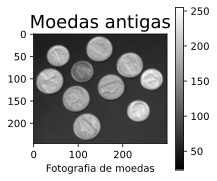

In [4]:
moedas = io.imread('D:\OneDrive\GitHub\Geoprocessing\PDI\Image_dataset\coins.png')

print('Tipo:',type(moedas)) # classe do objeto
print('Tipo de dado:',moedas.dtype) # tipo = float, uint8, uint32
print('Dimensões:',moedas.shape) # dimensões row, col, dim
print('Mínimo e máximo:',moedas.min(), moedas.max())

plt.figure(figsize=(3,3))
plt.imshow(moedas,cmap='gray')
plt.xlabel('Fotografia de moedas'); 
plt.title('Moedas antigas', fontsize=18)
plt.colorbar();  

Imagem colorida

Tipo: <class 'numpy.ndarray'>
Tipo de dado: uint8
Dimensões: (401, 441, 3)
Mínimo e máximo: 0 255


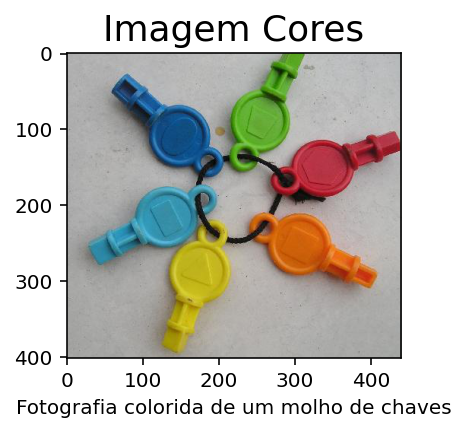

In [13]:
cores = io.imread('D:\OneDrive\GitHub\Geoprocessing\PDI\Image_dataset\cores.jpg')

print('Tipo:',type(cores)) # classe do objeto
print('Tipo de dado:',cores.dtype) # tipo = float, uint8, uint32
print('Dimensões:',cores.shape) # dimensões row, col, dim
print('Mínimo e máximo:',cores.min(), cores.max())

plt.figure(figsize=(3,3))
plt.imshow(cores)
plt.xlabel('Fotografia colorida de um molho de chaves'); 
plt.title('Imagem Cores', fontsize=18); 

## 1.2 Também é possível ler uma coleção (lista com nomes) de imagens:

In [ ]:
ic = io.ImageCollection('*s.png') # pegando só imagens png que terminem com s
#:../images/*.jpg') Cria uma lista de imagens, se tivesse png, podia fazer:
#ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))
ic.files

In [ ]:
# Quantidade de imagens:
num_img = len(ic); 
print('Número de imagens é:',num_img)

## 1.3 Também é possível exibir todas as imagens de uma coleção:

In [ ]:
io.imshow_collection(ic); 

## 1.4 Tipos de dados usados no skimage:


```
  0 - 255   em que  0 is preto, 255 é branco (para dados uint8)
  0 - 1     em que  0 is preto, 1 é branco (para dados float)
```

``scikit-image`` suporta as duas convenções.

Convertendo a imagem moedas para float:

In [7]:
from skimage import img_as_float, img_as_ubyte, img_as_uint

image = moedas

image_ubyte = img_as_ubyte(image)#inteiros uint8
image_float = img_as_float(image)#float 0,1
image_uint  = img_as_uint(image)# inteiros positivos [0,65535]

print("tipo, min, max, limites:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max(), skimage.dtype_limits(image_uint))
print("tipo, min, max, limites:", image_float.dtype, image_float.min(), image_float.max(), skimage.dtype_limits(image_float))
print("tipo, min, max, limites:", image_uint.dtype, image_uint.min(), image_uint.max(),skimage.dtype_limits(image_uint))

tipo, min, max, limites: uint8 23 255 (0, 65535)
tipo, min, max, limites: float64 0.09019607843137255 1.0 (-1, 1)
tipo, min, max, limites: uint16 5911 65535 (0, 65535)


## 1.5 Separando canais de imagens coloridas

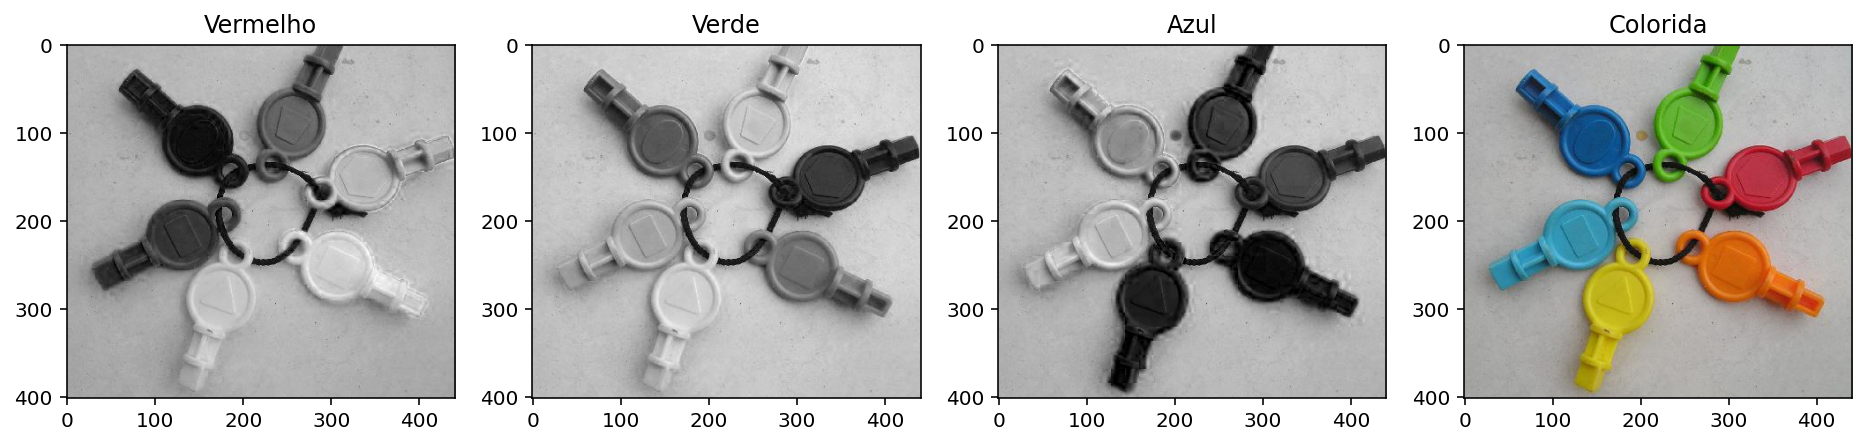

In [10]:
r = cores[:,:,0]# no python, índice começa em 0!
g = cores[:,:,1]
b = cores[:,:,2]

#Criando subplots
f, axes = plt.subplots(1, 4, figsize=(16, 5))

#Posso esconder os vamores de pixels nos eixos
#for ax in axes:
 #   ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('Vermelho')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('Verde')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('Azul')

#Fazendo composição colorida de novo
comp_cor = np.stack([r, g, b],axis=2)
ax_color.imshow(comp_cor)
ax_color.set_title('Colorida'); 

## 1.6 Exercício: Converter imagem `cores.jpg` para tons de cinza

Utilize a fórmula para luminância abaixo:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Compare o resultado com o obtido usando a função `skimage.color.rgb2gray`.

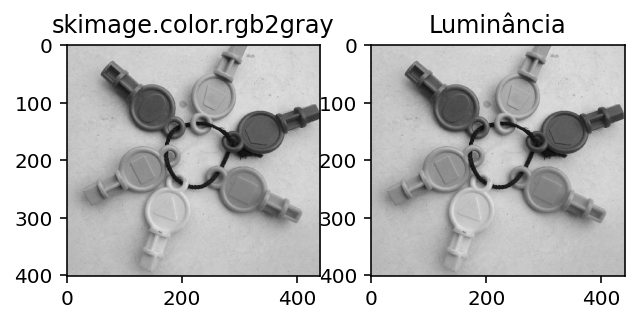

In [11]:
from skimage import color, img_as_float

image   = img_as_float(io.imread('D:\OneDrive\GitHub\Geoprocessing\PDI\Image_dataset\cores.jpg'))
gray    = color.rgb2gray(image)
my_gray = image[:,:,0] * 0.2126 + image[:,:,1] * 0.7152 + image[:,:,2] * 0.0722

# Mostrando os resultados

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(5, 5))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('Luminância'); 

## 1.7 Salvando a imagem de luminância

Vamos ver o intervalo de valores da imagem gerada

In [ ]:
plt.imshow(my_gray,cmap='gray')
plt.colorbar(); 

A imagem está em float, no intervalo de **0,1**.
É preciso converter em uint8 para salvar em png.

In [ ]:
#A imagem foi convertida em float, então fazer a conversão para uint8 de volta
my_gray_ubyte = img_as_ubyte(my_gray)#inteiros uint8
io.imsave('lumi.png',my_gray_ubyte)